# Datos de panel

Los datos de panel son datos que combinan una dimensión _temporal_ (tienen distintos cortes en el tiempo, con o sin regularidad) con una o más dimensiones _transversales_ (espacio -paises, provincias, departamentos-, productos, dependencias del estado, características sociodemográficas).

## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [52]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [53]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

## Aplicar funciones para transformar datos

Vamos a usar los datos de estadísticas de trámites automotores (https://datos.gob.ar/dataset/justicia_1ab0cc03-ab9b-4520-975c-5757d87d1061) y de motovehículos (https://datos.gob.ar/dataset/justicia_72d85f23-b751-4d12-935b-25e32ed9445e). El último CSV disponible en cada dataset incluye toda la historia.

In [70]:
# tomamos los datos de Estadísticas de Trámites Automotores
autos = pd.read_csv("http://datos.jus.gob.ar/dataset/1ab0cc03-ab9b-4520-975c-5757d87d1061/resource/4358c995-bb04-4ad9-be4a-a9076dc3e42c/download/estadistica-inscripciones-iniciales-automotores-2019-02.csv")
motos = pd.read_csv("http://datos.jus.gob.ar/dataset/72d85f23-b751-4d12-935b-25e32ed9445e/resource/d523dd08-5c12-467e-b947-aa3206a24d21/download/estadistica-inscripciones-iniciales-motovehiculos-2019-02.csv")

# nos quedamos con los datos de 2008 en adelante
autos = autos[autos.anio_inscripcion_inicial > 2008]
motos = motos[motos.anio_inscripcion_inicial > 2008]

In [71]:
autos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
2592,Automotores,2009,1,Buenos Aires,B,22663,6
2593,Automotores,2009,1,Catamarca,K,629,10
2594,Automotores,2009,1,Chaco,H,1773,22
2595,Automotores,2009,1,Chubut,U,2073,26
2596,Automotores,2009,1,Ciudad Autónoma de Bs.As.,C,11648,2


In [72]:
motos.head()

,tipo_vehiculo,anio_inscripcion_inicial,mes_inscripcion_inicial,provincia_inscripcion_inicial,letra_provincia_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
2305,Motovehículos,2009,1,Buenos Aires,B,14707,6.0
2306,Motovehículos,2009,1,Catamarca,K,230,10.0
2307,Motovehículos,2009,1,Chaco,H,1433,22.0
2308,Motovehículos,2009,1,Chubut,U,427,26.0
2309,Motovehículos,2009,1,Ciudad Autónoma de Bs.As.,C,1382,2.0


Ambos tienen la misma estructura. Chequeamos cuál es la "clave primaria" o el conjunto de dimensiones que nos permiten identinficar una única fila en la tabla.

In [73]:
len(autos.drop_duplicates())

2928

In [74]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial"]].drop_duplicates())

122

El tiempo no es clave primaria de esta tabla, porque los meses (230) no alcanzan para identificar todas las filas. Existe por lo menos una dimensión de apertura más.

In [75]:
len(autos[["anio_inscripcion_inicial", "mes_inscripcion_inicial", "provincia_inscripcion_inicial"]].drop_duplicates())

2928

Este es un panel cuya "clave primaria" es mes-provincia. Son las dos dimensiones de apertura que tienen los datos que contiene. Vamos a crear una nueva variable que contenga el mes, en formato de período en `pandas`.

In [76]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 2592 to 5519
Data columns (total 7 columns):
tipo_vehiculo                          2928 non-null object
anio_inscripcion_inicial               2928 non-null int64
mes_inscripcion_inicial                2928 non-null int64
provincia_inscripcion_inicial          2928 non-null object
letra_provincia_inscripcion_inicial    2928 non-null object
cantidad_inscripciones_iniciales       2928 non-null int64
provincia_indec_id                     2928 non-null int64
dtypes: int64(4), object(3)
memory usage: 183.0+ KB


Pandas permite crear funciones que reciben fila por fila (o columna por columna) del dataframe y realizan alguna operación. Luego de crearla podés aplicarla al dataframe (que recorre todas filas usando la función) y guardar el resultado en una nueva columna.

In [77]:
def crear_indice_tiempo(row):
    mes_str = "{}-{}".format(row["anio_inscripcion_inicial"], row["mes_inscripcion_inicial"])
    return pd.to_datetime(mes_str)

In [78]:
autos["indice_tiempo"] = autos.apply(crear_indice_tiempo, axis=1)

In [79]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 2592 to 5519
Data columns (total 8 columns):
tipo_vehiculo                          2928 non-null object
anio_inscripcion_inicial               2928 non-null int64
mes_inscripcion_inicial                2928 non-null int64
provincia_inscripcion_inicial          2928 non-null object
letra_provincia_inscripcion_inicial    2928 non-null object
cantidad_inscripciones_iniciales       2928 non-null int64
provincia_indec_id                     2928 non-null int64
indice_tiempo                          2928 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 205.9+ KB


**Ejercicio (obligatorio):** como las dos tablas tienen la misma estructura, podés re-utilizar la misma función para crear el mismo índice de tiempo en "motos". Crealo!

**Ejercicio:** crear una función que junte provincia y id en una nueva columna, poniendo el id entre paréntesis como en "Buenos Aires (06)" y aplicarla para crear "provincia_nombre_id".

## Convertir paneles en series de tiempo

`Pandas` permite graficar con la función `plot()` a partir de una serie o de un DataFrame con varias series numéricas, pero para esto vamos a tener que generar una serie de tiempo (colapsando todas las dimensiones de apertura que no sean "tiempo").

In [80]:
autos.groupby("indice_tiempo").sum()

,anio_inscripcion_inicial,mes_inscripcion_inicial,cantidad_inscripciones_iniciales,provincia_indec_id
indice_tiempo,,,,
2009-01-01,48216,24,74053,1152
2009-02-01,48216,48,39196,1152
2009-03-01,48216,72,41507,1152
2009-04-01,48216,96,40653,1152
2009-05-01,48216,120,40257,1152
2009-06-01,48216,144,44167,1152
2009-07-01,48216,168,46733,1152
2009-08-01,48216,192,42564,1152
2009-09-01,48216,216,46274,1152


No todas las variables numéricas que `pandas` encuentra que puede sumar tienen sentido para nosotros (ej.: los ids de las provincias), con lo cual nos quedamos sólo con la variable de interés.

In [81]:
autos_inscripciones_cant = autos.groupby("indice_tiempo").sum()["cantidad_inscripciones_iniciales"]

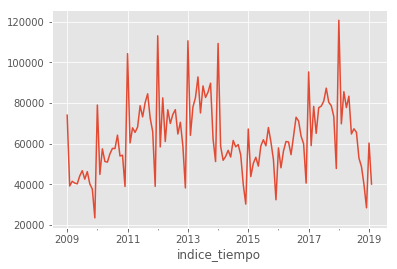

In [82]:
autos_inscripciones_cant.plot()

In [83]:
motos_inscripciones_cant = motos.groupby("indice_tiempo").sum()["cantidad_inscripciones_iniciales"]

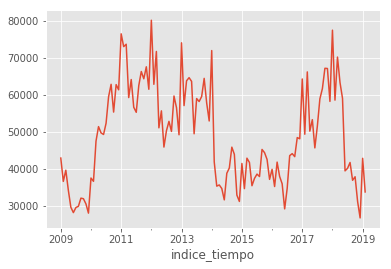

In [84]:
motos_inscripciones_cant.plot()

Podés crear un nuevo DataFrame con series que tengan índices compatibles, asignando un nombre a cada serie.

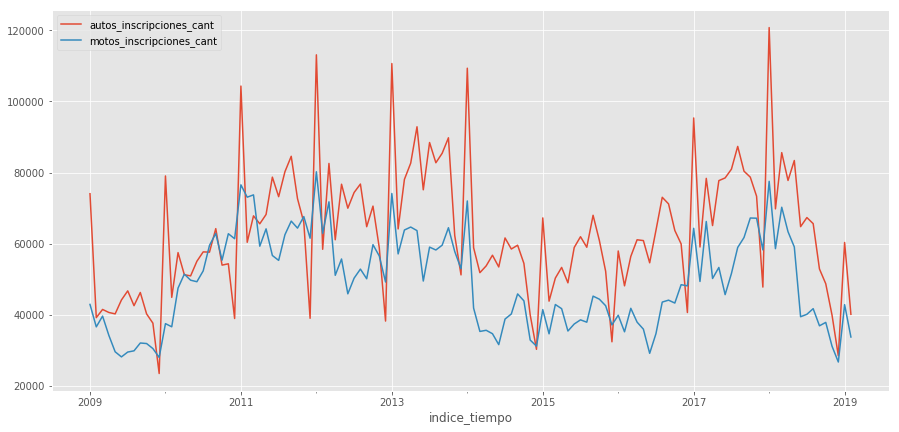

In [98]:
pd.DataFrame({
    "autos_inscripciones_cant": autos_inscripciones_cant,
    "motos_inscripciones_cant": motos_inscripciones_cant
}).plot(figsize=(15, 7))

**Ejercicio:** sumar (`.sum()`) es sólo una de las funciones que podemos usar para agrupar valores eligiendo una o varias dimensiones de apertura. Repetí el procedimiento usando `.count()` para chequear cuántos valores estamos sumando en cada mes para construir las series anteriores.

## Correlación en el tiempo

(Ejercicio simple de correlación en el tiempo)

## Correlación en el espacio

In [104]:
poblacion = pd.read_csv("data/poblacion.csv", converters={"provinci_id": str})

In [107]:
poblacion

,anio,provincia_id,poblacion
0,2010,2,3028481
1,2010,6,15716942
2,2010,10,377676
3,2010,14,3373025
4,2010,18,1017731
5,2010,22,1080017
6,2010,26,513433
7,2010,30,1255574
8,2010,34,551626
9,2010,38,683513


In [115]:
autos_anio = autos.groupby(["anio_inscripcion_inicial", "provincia_inscripcion_inicial", "provincia_indec_id"]).sum()
autos_anio.head()

mes_inscripcion_inicial  \
anio_inscripcion_inicial provincia_inscripcion_inicial provincia_indec_id                            
2009                     Buenos Aires                  6                                        78   
                         Catamarca                     10                                       78   
                         Chaco                         22                                       78   
                         Chubut                        26                                       78   
                         Ciudad Autónoma de Bs.As.     2                                        78   

                                                                           cantidad_inscripciones_iniciales  
anio_inscripcion_inicial provincia_inscripcion_inicial provincia_indec_id                                    
2009                     Buenos Aires                  6                                             168093  
                         Catamarca                     10                                              3337  
                         Chaco                         22                                              9772  
                         Chubut                        26                                             11981  
                         Ciudad Autónoma de Bs.As.     2                                              96479

In [116]:
autos_anio = autos_anio.reset_index()
autos_anio.head()

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,mes_inscripcion_inicial,cantidad_inscripciones_iniciales
0,2009,Buenos Aires,6,78,168093
1,2009,Catamarca,10,78,3337
2,2009,Chaco,22,78,9772
3,2009,Chubut,26,78,11981
4,2009,Ciudad Autónoma de Bs.As.,2,78,96479


In [117]:
autos_anio.columns

Index(['anio_inscripcion_inicial', 'provincia_inscripcion_inicial',
       'provincia_indec_id', 'mes_inscripcion_inicial',
       'cantidad_inscripciones_iniciales'],
      dtype='object')

In [118]:
autos_anio = autos_anio[[
    'anio_inscripcion_inicial', 
    'provincia_inscripcion_inicial',
    'provincia_indec_id', 
    'cantidad_inscripciones_iniciales']]

In [120]:
autos_poblacion = autos_anio.merge(
    poblacion, 
    left_on=["anio_inscripcion_inicial", "provincia_indec_id"],
    right_on=["anio", "provincia_id"]
)
autos_poblacion.head()

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales,anio,provincia_id,poblacion
0,2010,Buenos Aires,6,219215,2010,6,15716942
1,2010,Catamarca,10,3860,2010,10,377676
2,2010,Chaco,22,9658,2010,22,1080017
3,2010,Chubut,26,13513,2010,26,513433
4,2010,Ciudad Autónoma de Bs.As.,2,123518,2010,2,3028481


In [121]:
autos_poblacion["inscripciones_per_capita"] = autos_poblacion.cantidad_inscripciones_iniciales / autos_poblacion.poblacion

In [122]:
autos_poblacion

,anio_inscripcion_inicial,provincia_inscripcion_inicial,provincia_indec_id,cantidad_inscripciones_iniciales,anio,provincia_id,poblacion,inscripciones_per_capita
0,2010,Buenos Aires,6,219215,2010,6,15716942,0.013948
1,2010,Catamarca,10,3860,2010,10,377676,0.010220
2,2010,Chaco,22,9658,2010,22,1080017,0.008942
3,2010,Chubut,26,13513,2010,26,513433,0.026319
4,2010,Ciudad Autónoma de Bs.As.,2,123518,2010,2,3028481,0.040785
5,2010,Corrientes,18,14119,2010,18,1017731,0.013873
6,2010,Córdoba,14,66129,2010,14,3373025,0.019605
7,2010,Entre Ríos,30,17317,2010,30,1255574,0.013792
8,2010,Formosa,34,5828,2010,34,551626,0.010565
9,2010,Jujuy,38,8247,2010,38,683513,0.012066


AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

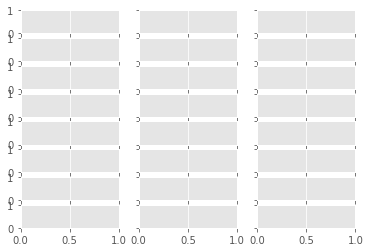

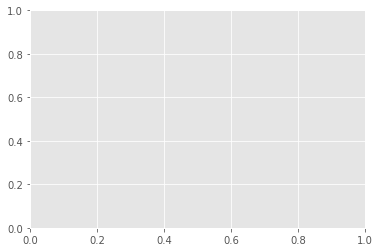

In [128]:
fig, ax = plt.subplots(8, 3, sharex=True, sharey=True)

for index, provincia in enumerate(autos_poblacion.provincia_inscripcion_inicial.unique()):
    autos_poblacion[
        autos_poblacion.provincia_inscripcion_inicial == provincia
    ].plot("inscripciones_per_capita", axes=ax[index])